Biosignalverarbeitung Praktikum 3 - Auswertung Daten Elisabeth Krepper (MVC, Weight, Fatigue)

1. Vorverarbeitung der EMG-Daten

In [21]:
#Bibliotheken importieren

%pip install matplotlib numpy scipy

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sc
import Lab3Functions as lf3

c:\Users\elisa\Desktop\MCI\3_MGST_WS_2425(3)\Biosignalverarbeitung\Praktikum3\Tests_gesamt_Lisi\Lab3Functions.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fatigue_raw = pd.concat([fatigue_raw, pd.read_csv(


        emg      t
0      1487    119
1      1487    122
2      1487    124
3      1487    128
4      1487    130
...     ...    ...
15169  1482  37596
15170  1482  37599
15171  1482  37601
15172  1482  37604
15173  1482  37606

[15174 rows x 2 columns]


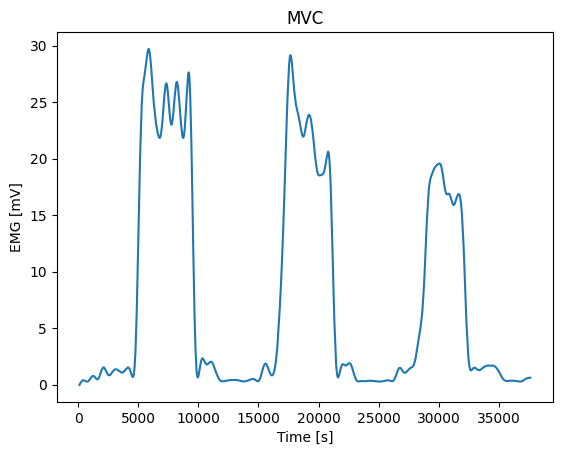

In [ ]:
#Importieren der Daten
weights, mvc, fatigue = lf3.import_data('\t')

print(mvc)

#Offset von ca. 1480 im emg Datensatz entfernen
mvc['emg'] = mvc['emg'] - 1480

#Butterworth Filter (20 Hz bis 450 Hz) anwenden (nicht im lf3)
b, a = sc.butter(4, [20/500, 450/500], btype='bandpass')
mvc['emg'] = sc.filtfilt(b, a, mvc['emg'])

#Gleichrichten der Daten (nicht im lf3)
mvc['emg'] = np.abs(mvc['emg'])

#Einhüllende Bilden: Tiefpass Grenfrequenz 3 Hz (nicht im lf3)
b, a = sc.butter(4, 3/500, btype='lowpass')
mvc['emg'] = sc.filtfilt(b, a, mvc['emg'])


#Plotten der Daten emg als y, t als x
plt.plot(mvc['t'], mvc['emg'])
plt.xlabel('Time [s]')
plt.ylabel('EMG [mV]')
plt.title('MVC')
plt.show()

#ACHTUNG ZEIT NOCH NICHT IN SEKUNDEN